In [205]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [206]:
df = pd.read_csv("Retail_Transactions_2000.csv")

In [224]:

print("Shape of dataset:", df.shape)

print("\nColumn names:\n", df.columns.tolist())

print("\nData Types:\n", df.dtypes)

Shape of dataset: (2000, 14)

Column names:
 ['TransactionID', 'CustomerID', 'Gender', 'Age', 'City', 'ProductCategory', 'Quantity', 'Price', 'PurchaseDate', 'PaymentMode', 'TotalAmount', 'Month', 'DayOfWeek', 'AgeGroup']

Data Types:
 TransactionID              object
CustomerID                 object
Gender                      int64
Age                       float64
City                        int64
ProductCategory             int64
Quantity                    int64
Price                     float64
PurchaseDate       datetime64[ns]
PaymentMode                 int64
TotalAmount               float64
Month                      object
DayOfWeek                  object
AgeGroup                 category
dtype: object


In [208]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64


In [209]:
print("\nNumber of Duplicates:", df.duplicated().sum())


Number of Duplicates: 0


In [210]:
df.head(5)

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123


In [211]:
df['Gender'] = df['Gender'].str.strip().str.capitalize()
df['Gender'] = df['Gender'].replace({'M': 'Male', 'F': 'Female'})
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]
df['TotalAmount'] = df['Quantity'] * df['Price']

print("Duplicate Transactions:", df.duplicated('TransactionID').sum())
print("\nUnique Gender Values:", df['Gender'].unique())
print("\nInvalid Quantity/Price rows:", ((df['Quantity'] <= 0) | (df['Price'] <= 0)).sum())


Duplicate Transactions: 0

Unique Gender Values: ['Female' 'Other' 'Male']

Invalid Quantity/Price rows: 0


In [212]:
df['TotalAmount'] = df['TotalAmount'].fillna(df['Quantity'] * df['Price'])

df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], errors='coerce')
df['Month'] = df['PurchaseDate'].dt.month_name()
df['DayOfWeek'] = df['PurchaseDate'].dt.day_name()

In [213]:
bins = [0, 18, 25, 40, 60, np.inf]
labels = ['Under 18', '18-25', '26-40', '41-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [214]:

print(df[['TotalAmount', 'Month', 'DayOfWeek', 'Age', 'AgeGroup']].head())

   TotalAmount      Month  DayOfWeek  Age AgeGroup
0        13437      March  Wednesday   33    26-40
1         5255    January     Sunday   20    18-25
2          111      April    Tuesday   47    41-60
3        14730     August  Wednesday   21    18-25
4         3123  September   Saturday   41    41-60


In [215]:

label_cols = ['Gender', 'City', 'ProductCategory', 'PaymentMode']
encoder = LabelEncoder()

for col in label_cols:
    df[col] = encoder.fit_transform(df[col])

scaler = MinMaxScaler()
num_cols = ['Age', 'Price', 'TotalAmount']

df[num_cols] = scaler.fit_transform(df[num_cols])
print("\nData Types After Transformation:\n", df.dtypes)



Data Types After Transformation:
 TransactionID              object
CustomerID                 object
Gender                      int64
Age                       float64
City                        int64
ProductCategory             int64
Quantity                    int64
Price                     float64
PurchaseDate       datetime64[ns]
PaymentMode                 int64
TotalAmount               float64
Month                      object
DayOfWeek                  object
AgeGroup                 category
dtype: object


In [216]:
df.head(5)

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Month,DayOfWeek,AgeGroup
0,T00001,C2824,0,0.288462,1,3,3,0.893673,2023-03-15,1,0.536495,March,Wednesday,26-40
1,T00002,C1409,2,0.038462,9,1,5,0.194082,2023-01-22,0,0.207094,January,Sunday,18-25
2,T00003,C5506,2,0.557692,9,4,1,0.002245,2023-04-18,3,0.000000,April,Tuesday,41-60
3,T00004,C5012,2,0.057692,4,5,5,0.580816,2023-08-09,1,0.588550,August,Wednesday,18-25
4,T00005,C4657,0,0.442308,2,6,1,0.616939,2023-09-23,3,0.121261,September,Saturday,41-60


In [217]:
print(df.isnull().sum())
print("\nInvalid Quantity or Price rows:", ((df['Quantity'] <= 0) | (df['Price'] <= 0)).sum())


TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
Month              0
DayOfWeek          0
AgeGroup           0
dtype: int64

Invalid Quantity or Price rows: 1


In [218]:

print("\nData Types:\n", df.dtypes)


Data Types:
 TransactionID              object
CustomerID                 object
Gender                      int64
Age                       float64
City                        int64
ProductCategory             int64
Quantity                    int64
Price                     float64
PurchaseDate       datetime64[ns]
PaymentMode                 int64
TotalAmount               float64
Month                      object
DayOfWeek                  object
AgeGroup                 category
dtype: object


In [219]:
df.to_csv("Retail_Cleaned.csv", index=False)

print("\n Data cleaning complete!")


 Data cleaning complete!


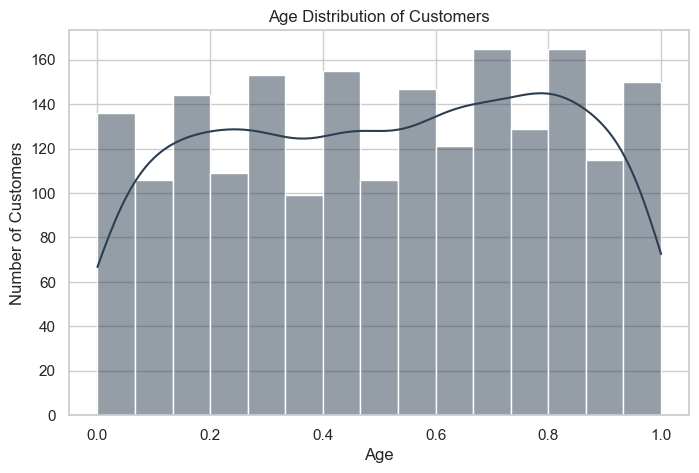

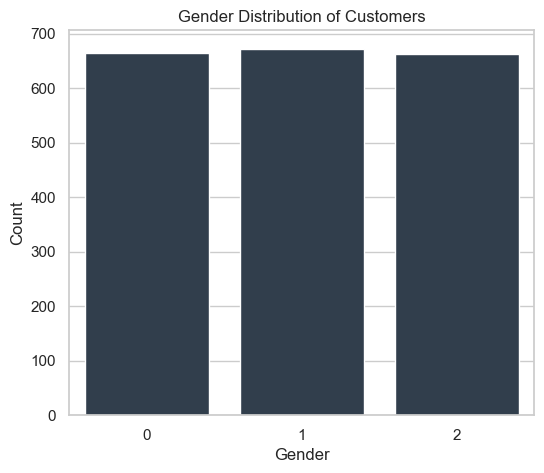

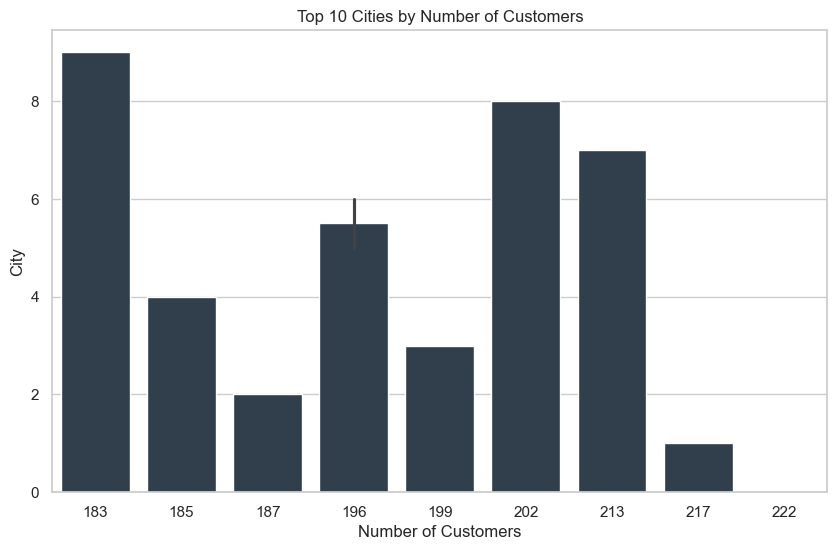

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette=["#2C3E50"])
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=15, kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()


plt.figure(figsize=(6, 5))
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution of Customers")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


top_cities = df['City'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top 10 Cities by Number of Customers")
plt.xlabel("Number of Customers")
plt.ylabel("City")
plt.show()


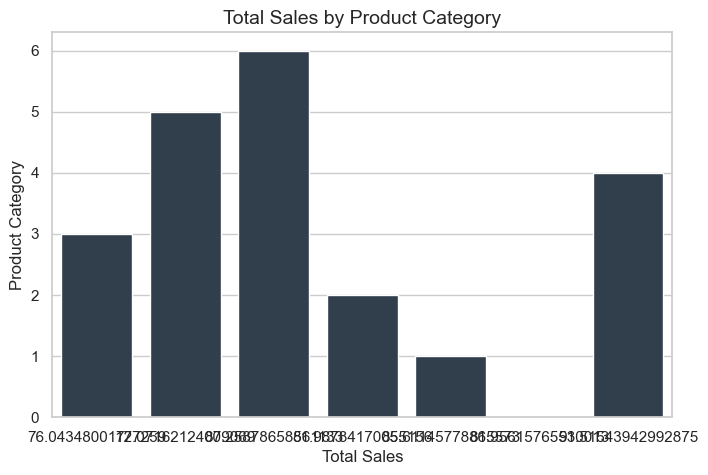

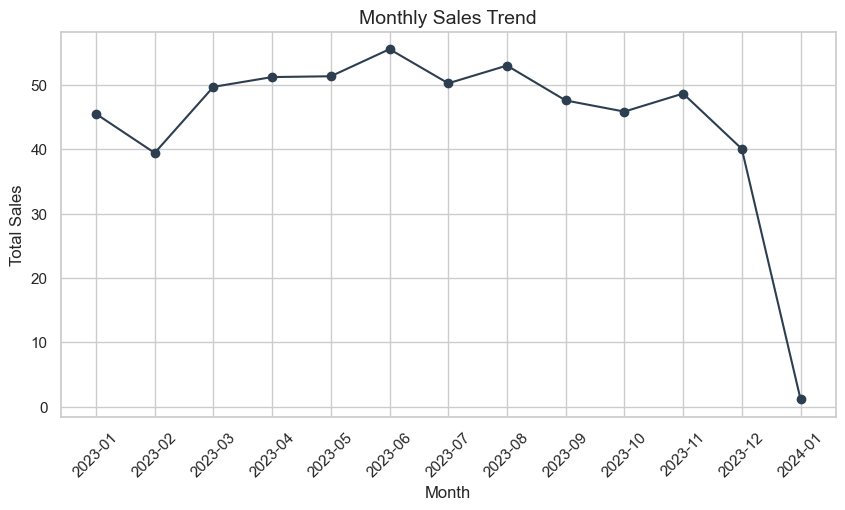

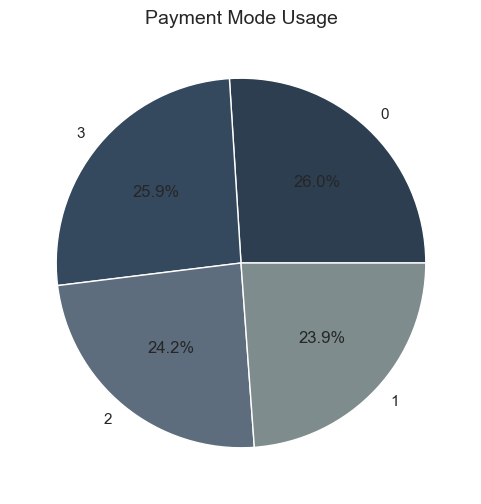

In [221]:

sns.set(style="whitegrid", palette=["#2C3E50"]) 
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], errors='coerce')

sales_by_category = df.groupby('ProductCategory')['TotalAmount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_category.values, y=sales_by_category.index, color="#2C3E50")
plt.title("Total Sales by Product Category", fontsize=14)
plt.xlabel("Total Sales")
plt.ylabel("Product Category")
plt.show()

df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], errors='coerce')
monthly_sales = df.groupby(df['PurchaseDate'].dt.to_period('M'))['TotalAmount'].sum()
plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', color="#2C3E50")
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

payment_counts = df['PaymentMode'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', 
        colors=["#2C3E50", "#34495E", "#5D6D7E", "#7F8C8D", "#1C2833"])
plt.title("Payment Mode Usage", fontsize=14)
plt.show()


C:\Users\NANDHANAA M\AppData\Local\Temp\ipykernel_24780\2877508709.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spend = df.groupby('AgeGroup')['TotalAmount'].mean()


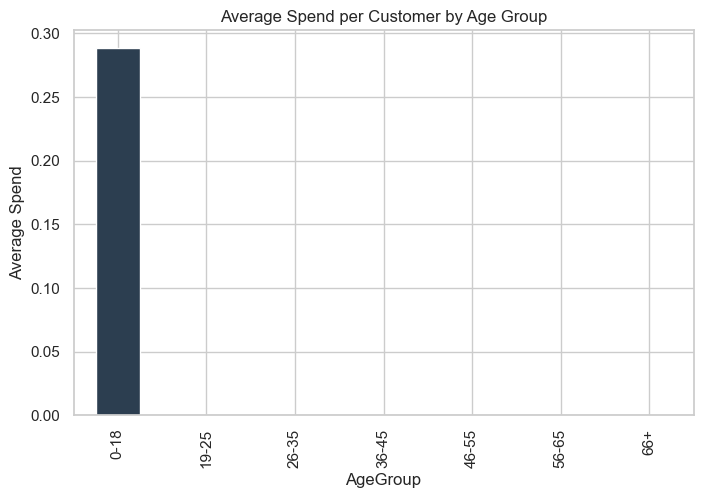

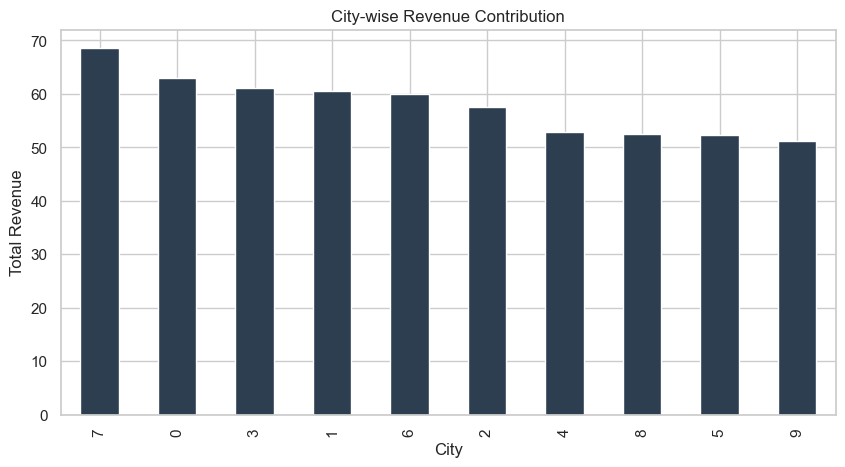

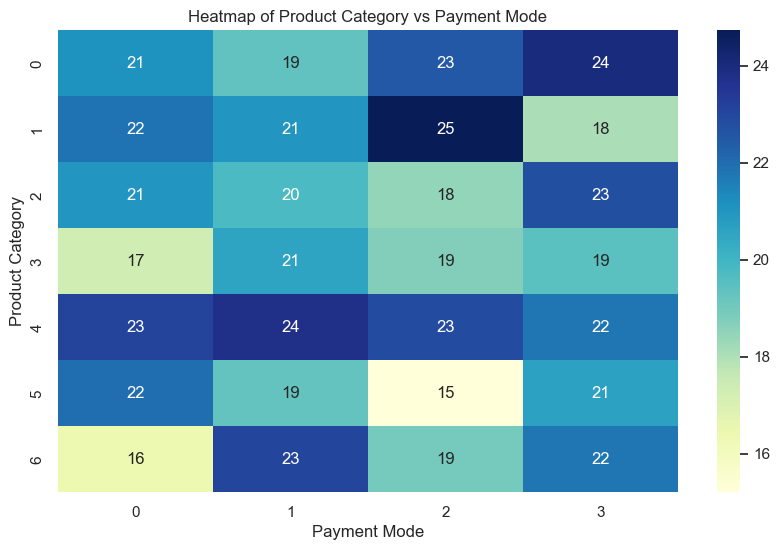

In [222]:

bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18','19-25','26-35','36-45','46-55','56-65','66+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

avg_spend = df.groupby('AgeGroup')['TotalAmount'].mean()
avg_spend.plot(kind='bar', figsize=(8,5), title='Average Spend per Customer by Age Group', color="#2C3E50")
plt.ylabel('Average Spend')
plt.show()

city_sales = df.groupby('City')['TotalAmount'].sum().sort_values(ascending=False)
city_sales.plot(kind='bar', figsize=(10,5), title='City-wise Revenue Contribution', color="#2C3E50")
plt.ylabel('Total Revenue')
plt.show()

heat_data = df.pivot_table(index='ProductCategory', columns='PaymentMode', values='TotalAmount', aggfunc='sum', fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(heat_data, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Heatmap of Product Category vs Payment Mode')
plt.ylabel('Product Category')
plt.xlabel('Payment Mode')
plt.show()
